## Observations and Insights 
1. The mice tested were even distributed between male and female
2. Capomulin and Ramicane are related to smaller tumer volumes
3. Ketapril has the largest variance and standard deviation across the results
4. There seems to be a pretty strong relationship between tumor volume and weights

In [1]:
# Dependencies and Setup, import necessary libraries
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
from scipy.stats import sem
from scipy.stats import linregress


In [2]:
# store study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
#merge the two tables above into a single table, merge on Mouse ID
all_mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
all_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [4]:
#Checking the number of rows 
len(all_mouse_df["Mouse ID"])

1893

In [5]:

#store the mouse ids, create a dataframe of Mouse IDs where Mouse ID and Timepoint are duplicated
#store those ids in a list, check list with data
m_ids = all_mouse_df["Mouse ID"]
dup_id_df = all_mouse_df.duplicated(subset=["Mouse ID","Timepoint"])
dup_list = all_mouse_df[m_ids.isin(m_ids[dup_id_df])]
dup_list



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_list["Mouse ID"].unique()

array(['g989'], dtype=object)

In [7]:
# drop the duplicate id rows, by droping rows that containt IDs in the dropList
droplist = dup_list["Mouse ID"].unique()
no_dups_mouse_df = all_mouse_df[all_mouse_df["Mouse ID"].isin(droplist) == False]

In [8]:
#checking number of unique mouse IDs to ensure the id was dropped
no_dups_mouse_df["Mouse ID"].nunique()

248

In [9]:
#checking length of new data frame to confirm rows were dropped
len(no_dups_mouse_df["Mouse ID"])

1880

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#create a dataframe groupeed by drugs and get list of Tumer Volumes
drug_df = no_dups_mouse_df.groupby("Drug Regimen")
tumor_volume = drug_df["Tumor Volume (mm3)"]



In [11]:

#store the different the various summary statistics in a variable to use in creating the dataframe
mean_tv = tumor_volume.mean()
median_tv = tumor_volume.median()
mode_tv = tumor_volume.agg(pd.Series.mode)
std_tv = tumor_volume.std()
variance_tv = tumor_volume.var()
sem_tv = tumor_volume.sem()
#create dataframe with above varables of summary statistics and display
summary_tv_df = pd.DataFrame({
    "mean" : mean_tv,
    "median": median_tv,
    "mode" : mode_tv,
    "variance" : variance_tv,
    "std" : std_tv,
    "SEM" : sem_tv
})
summary_tv_df

,mean,median,mode,variance,std,SEM
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,45.0,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,45.0,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,45.0,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,45.0,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,45.0,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,45.0,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,45.0,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,45.0,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,45.0,59.450562,7.710419,0.573111


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line
#created a dataframe with just the drug and volume column
#groupped by drug and used the agg method to run the calculations
tv_df = no_dups_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]]
tv_df.groupby("Drug Regimen").agg([np.mean, np.median, pd.Series.mode, np.var, np.std, st.sem])

Tumor Volume (mm3)                                        \
                           mean     median  mode        var       std   
Drug Regimen                                                            
Capomulin             40.675741  41.557809  45.0  24.947764  4.994774   
Ceftamin              52.591172  51.776157  45.0  39.290177  6.268188   
Infubinol             52.884795  51.820584  45.0  43.128684  6.567243   
Ketapril              55.235638  53.698743  45.0  68.553577  8.279709   
Naftisol              54.331565  52.509285  45.0  66.173479  8.134708   
Placebo               54.033581  52.288934  45.0  61.168083  7.821003   
Propriva              52.320930  50.446266  45.0  43.852013  6.622085   
Ramicane              40.216745  40.673236  45.0  23.486704  4.846308   
Stelasyn              54.233149  52.431737  45.0  59.450562  7.710419   
Zoniferol             53.236507  51.818479  45.0  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

In [13]:

#show the total number of timepoints for all mice tested for each drug regimen throughout the course of the study
#create a df that count timepoints for each drug, used the drug df from above
#created a new data frame for the bar chart

drug_tests = drug_df["Timepoint"].count()
drug_chart = pd.DataFrame({
    "# tests" : drug_tests
})
chartlabels = list(drug_chart.index.values)
drug_chart


,# tests
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


In [14]:
drug_chart2 = drug_chart.reset_index()
drug_chart2 = drug_chart2.sort_values(by="# tests")

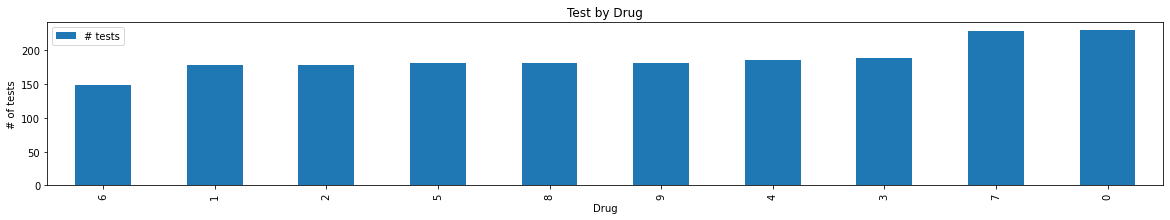

<Figure size 432x288 with 0 Axes>

In [15]:
drug_chart2.plot(kind="bar",figsize=(20,3))
plt.title("Test by Drug")
plt.ylabel("# of tests")
plt.xlabel("Drug")
plt.show()
plt.tight_layout()

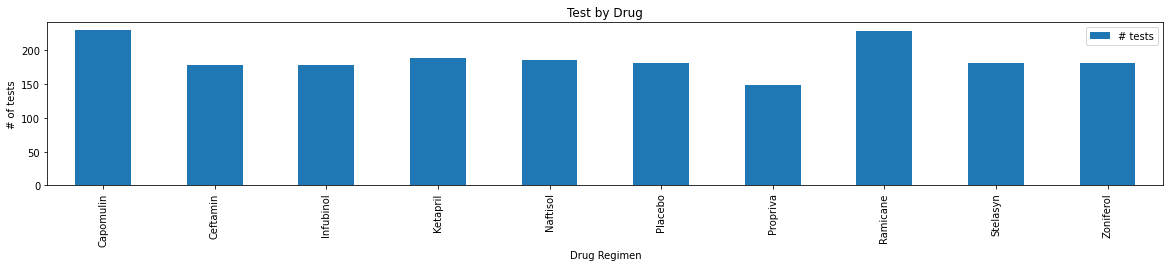

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_chart.plot(kind="bar",figsize=(20,3))
plt.title("Test by Drug")
plt.ylabel("# of tests")
plt.show()
plt.tight_layout()

In [17]:
drug_chart

,# tests
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


In [18]:
#reset index to create barchart using plt.bar
drug_chart_index = drug_chart.reset_index()
drug_chart_index

,Drug Regimen,# tests
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


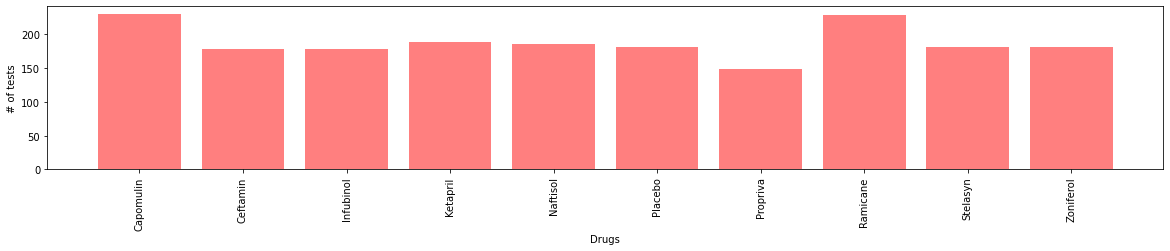

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(drug_chart_index))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, drug_chart_index["# tests"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_chart_index["Drug Regimen"], rotation="vertical")
plt.ylabel("# of tests")
plt.xlabel("Drugs")
plt.show()

In [20]:
#create pie charts to show # of mice based on sex, group df from above on sex
#count mice by unique mouse ID to get number of mice and store in variable
#create new dataframe for output and to chart
mice_grouped = no_dups_mouse_df.groupby("Sex")
mice_count = mice_grouped["Mouse ID"].nunique()
mice_sex_df = pd.DataFrame({
    "mice #" : mice_count
})
micechartlabels = list(mice_sex_df.index.values)
mice_sex_df

,mice #
Sex,
Female,123
Male,125


<AxesSubplot:ylabel='mice #'>

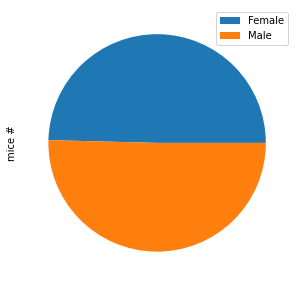

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_df.plot(kind="pie",y="mice #", textprops={'color':"w"}, figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x7f8fb3a890a0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

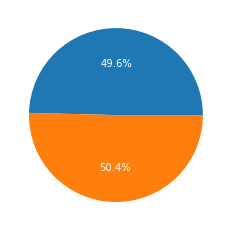

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex_df["mice #"],labels=micechartlabels,  autopct="%1.1f%%", textprops={'color':"w"})


## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# groupby on mouseID, take the max on the timepoint column, reset index so it can be merged
# merge on mouse id and time point for drug volume

final_tp = no_dups_mouse_df.groupby("Mouse ID")["Timepoint"].max()
final_tp.reset_index()

final_tv = pd.merge(final_tp, no_dups_mouse_df, on=["Mouse ID","Timepoint"])
final_tv

# Capomulin, Ramicane, Infubinol, and Ceftamin
# show rows with only the above drugs
# show only the drug and tumor volume columns and display df
drug_final_v = final_tv[final_tv["Drug Regimen"].isin(["Capomulin","Ramicane", "Infubinol", "Ceftamin"])]
drug_final_v = drug_final_v[["Drug Regimen","Tumor Volume (mm3)"]]
drug_final_v


,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
3,Ceftamin,62.999356
6,Ramicane,38.407618
7,Ramicane,43.047543
...,...,...
238,Ceftamin,68.594745
239,Capomulin,31.896238
240,Ceftamin,64.729837
244,Ramicane,30.638696


In [24]:
#store list of drugs in variable
treatments = drug_final_v["Drug Regimen"]
treatments

0      Infubinol
1      Infubinol
3       Ceftamin
6       Ramicane
7       Ramicane
         ...    
238     Ceftamin
239    Capomulin
240     Ceftamin
244     Ramicane
245    Infubinol
Name: Drug Regimen, Length: 100, dtype: object

In [25]:
#store list of volumes in variable
volumes = drug_final_v["Tumor Volume (mm3)"]
volumes

0      67.973419
1      65.525743
3      62.999356
6      38.407618
7      43.047543
         ...    
238    68.594745
239    31.896238
240    64.729837
244    30.638696
245    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [26]:
#calculate the quartiles, lower, upper, and inner using the variables above

quartiles = volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volumes is: {lowerq}")
print(f"The upper quartile of volumes is: {upperq}")
print(f"The interquartile range of volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of volumes is: 37.1877438025
The upper quartile of volumes is: 59.930261755
The interquartile range of volumes is: 22.742517952499995
The the median of volumes is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [27]:
#show unique drugs in DF
drug_final_v["Drug Regimen"].unique()

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='[Drug Regimen]'>

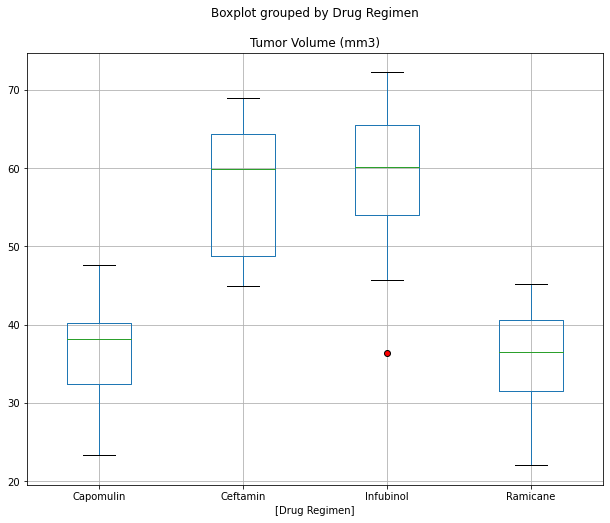

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# using the drug df and boxplot method, create box plot by Drug name which creates four box plots
drug_final_v.boxplot(by='Drug Regimen',figsize=(10,8), flierprops=dict(markerfacecolor='r'))

## Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# create a df for mice with only rows that contain the drug above
# update the DF with the applicable columns
mouse_df = no_dups_mouse_df[no_dups_mouse_df["Drug Regimen"].isin(["Capomulin"])]
mouse_df = mouse_df[["Mouse ID","Tumor Volume (mm3)","Timepoint","Weight (g)"]]
mouse_df

,Mouse ID,Tumor Volume (mm3),Timepoint,Weight (g)
0,b128,45.000000,0,22
1,b128,45.651331,5,22
2,b128,43.270852,10,22
3,b128,43.784893,15,22
4,b128,42.731552,20,22
...,...,...,...,...
1888,m601,33.118756,25,17
1889,m601,31.758275,30,17
1890,m601,30.834357,35,17
1891,m601,31.378045,40,17


In [30]:
#check the mouse ids in the df
mouse_df["Mouse ID"].unique()

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

In [31]:
#create a new df for a single mouse id
one_mouse_df = mouse_df[mouse_df["Mouse ID"].str.match('b128')]
one_mouse_df

,Mouse ID,Tumor Volume (mm3),Timepoint,Weight (g)
0,b128,45.000000,0,22
1,b128,45.651331,5,22
2,b128,43.270852,10,22
3,b128,43.784893,15,22
4,b128,42.731552,20,22
5,b128,43.262145,25,22
6,b128,40.605335,30,22
7,b128,37.967644,35,22
8,b128,38.379726,40,22
9,b128,38.982878,45,22


In [32]:
# store tumor and time values in variables for the x and y axises in the scatter plot chart for a single mouse
one_mouse_x = one_mouse_df["Tumor Volume (mm3)"]
one_mouse_x


0    45.000000
1    45.651331
2    43.270852
3    43.784893
4    42.731552
5    43.262145
6    40.605335
7    37.967644
8    38.379726
9    38.982878
Name: Tumor Volume (mm3), dtype: float64

In [33]:
one_mouse_y = one_mouse_df["Timepoint"]
one_mouse_y

0     0
1     5
2    10
3    15
4    20
5    25
6    30
7    35
8    40
9    45
Name: Timepoint, dtype: int64

Text(0, 0.5, 'Timepoint')

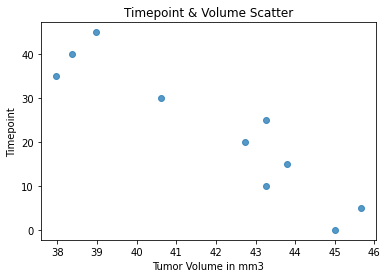

In [49]:
#line chart for a single mouse by timepoint and volume
plt.scatter(one_mouse_x,one_mouse_y,marker='o',alpha=0.75)
plt.title("Timepoint & Volume Scatter")
plt.xlabel('Tumor Volume in mm3')
plt.ylabel('Timepoint')

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#group by mouse id and get the mean volume of each mouse and then the mean wieght of each mouse
mouse_group = mouse_df.groupby("Mouse ID")
avg_v = mouse_group["Tumor Volume (mm3)"].mean()
avg_w = mouse_group["Weight (g)"].mean()

In [36]:
mouse_group.mean()

,Tumor Volume (mm3),Timepoint,Weight (g)
Mouse ID,,,
b128,41.963636,22.5,22.0
b742,40.083699,22.5,21.0
f966,36.505973,10.0,17.0
g288,41.990097,22.5,19.0
g316,44.613344,22.5,22.0
i557,44.805810,22.5,24.0
i738,39.141053,22.5,20.0
j119,44.465236,22.5,23.0
j246,43.216925,17.5,21.0


In [37]:
avg_w

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

Text(0, 0.5, 'avg weight')

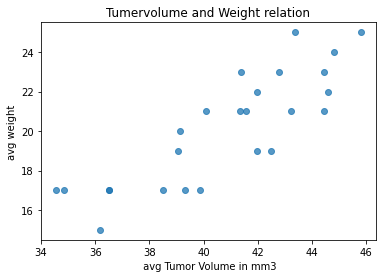

In [50]:
# store the values above in an x and y variabel for the scatter chart
mouse_group_x = avg_v
mouse_group_y = avg_w
plt.scatter(mouse_group_x,mouse_group_y,marker='o',alpha=0.75)
plt.title("Tumervolume and Weight relation")
plt.xlabel(' avg Tumor Volume in mm3')
plt.ylabel('avg weight')

## Correlation and Regression

In [39]:
#create a df for the average weights and volume by mouse
mouse_group_df = pd.DataFrame({
    "avg Weights" : avg_w,
    "avg volume" : avg_v
    })
mouse_group_df

,avg Weights,avg volume
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


In [40]:
# Calculate the correlation coefficient
print(f"The correlation coefficient between weight and tumor volume is {round(st.pearsonr(avg_w,avg_v)[0],2)}")

The correlation coefficient between weight and tumor volume is 0.84


The r-squared is: 0.7088568047708723


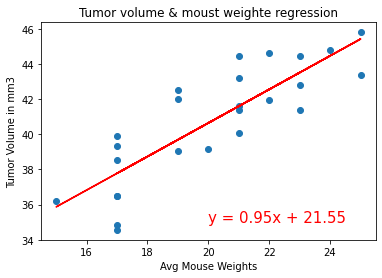

In [51]:
#and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_w
y_values = avg_v
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.title("Tumor volume & moust weighte regression")
plt.xlabel('Avg Mouse Weights')
plt.ylabel('Tumor Volume in mm3')
print(f"The r-squared is: {rvalue**2}")
plt.show()
